# E-Commerce Data Cleansing & Analysis

In [75]:
# Change current working directory

import os
os.chdir("C:/Users/crash/sets")
os.getcwd()

'C:\\Users\\crash\\sets'

In [76]:
# Importing all the libraries required

!pip install googletrans==4.0.0-rc1
import googletrans
from googletrans import Translator
import numpy as np
import pandas as pd
import datetime
!pip install yellowbrick
import yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from matplotlib.gridspec import GridSpec
from matplotlib.ticker import FuncFormatter
from collections import Counter

# Importing datasets

In [77]:
# Importing the datasets

import pandas as pd
customers=pd.read_csv("olist_customers_dataset.csv")
locations=pd.read_csv("olist_geolocation_dataset.csv")
items=pd.read_csv("olist_order_items_dataset.csv")
payments=pd.read_csv("olist_order_payments_dataset.csv")
reviews=pd.read_csv("olist_order_reviews_dataset.csv")
orders=pd.read_csv("olist_orders_dataset.csv")
products=pd.read_csv("olist_products_dataset.csv")
sellers=pd.read_csv("olist_sellers_dataset.csv")

# Data Cleanup operations

In [78]:
customers.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [79]:
locations.head(5)

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [80]:
sellers.head(5)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [81]:
# Cleaning up the datasets

# Renaming the columns: customer_zip_code_prefix and geolocation_zip_code_prefix to zip_code 
# in datasets customers and locations
customers.rename(columns={"customer_zip_code_prefix": "zip_code"}, inplace=True)
locations.rename(columns={"geolocation_zip_code_prefix": "zip_code"}, inplace=True)
sellers.rename(columns={"seller_zip_code_prefix": "zip_code"}, inplace=True)
# Calling the dataframe to check if the column heading changed
locations.head(5)

,zip_code,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [82]:
customers.head(5)

,customer_id,customer_unique_id,zip_code,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [83]:
sellers.head(5)

,seller_id,zip_code,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In products dataset, the column: product_category_name is in Portuguese language. Translating them into English by using googletrans library.

In [84]:
# To make the google translations accurate, we remove the underscores in the product category names
products['product_category_name']=products['product_category_name'].str.replace("_"," ")
products

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0
...,...,...,...,...,...,...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis decoracao,45.0,67.0,2.0,12300.0,40.0,40.0,40.0
32947,bf4538d88321d0fd4412a93c974510e6,construcao ferramentas iluminacao,41.0,971.0,1.0,1700.0,16.0,19.0,16.0
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama mesa banho,50.0,799.0,1.0,1400.0,27.0,7.0,27.0
32949,83808703fc0706a22e264b9d75f04a2e,informatica acessorios,60.0,156.0,2.0,700.0,31.0,13.0,20.0


# Using 'googletrans' library to translate data from Portuguese to English

In [85]:
#pip install googletrans==4.0.0-rc1
import googletrans
from googletrans import Translator
import numpy as np
# Defining a translator
translator= Translator()

# Dictionary of translated words
translations = {}

# Selecting only unique elements of the column for translation
unique_elements = products['product_category_name'].unique()
for element in unique_elements:
    # add translation to the dictionary
    translations[element] = translator.translate(element).text

In [86]:
# Translated product category names
print(translations)

{'perfumaria': 'perfumery', 'artes': 'artes', 'esporte lazer': 'sport leisure', 'bebes': 'babies', 'utilidades domesticas': 'domestic profits', 'instrumentos musicais': 'musical instruments', 'cool stuff': 'cool stuff', 'moveis decoracao': 'Furniture Decoration', 'eletrodomesticos': 'home appliances', 'brinquedos': 'toys', 'cama mesa banho': 'bed table bath', 'construcao ferramentas seguranca': 'CONSTRUCTION SECURITY TOOLS', 'informatica acessorios': 'computer accessories', 'beleza saude': 'HEALTH BEAUTY', 'malas acessorios': 'Bags Accessories', 'ferramentas jardim': 'Garden tools', 'moveis escritorio': 'Furniture office', 'automotivo': 'automotive', 'eletronicos': 'electronics', 'fashion calcados': 'Fashion Calcados', 'telefonia': 'telephony', 'papelaria': 'stationary store', 'fashion bolsas e acessorios': 'Fashion Bags and Accessories', 'pcs': 'pcs', 'casa construcao': 'Casa Construcao', 'relogios presentes': 'Watches present', 'construcao ferramentas construcao': 'Construction Tools

In [87]:
# Replacing the Protuguese names with translated English names
products.replace({"product_category_name": translations},inplace=True)
products.head(5)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,domestic profits,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [88]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [89]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [90]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [91]:
# In orders, reviews and items dataframes, timestamps are of data type "object"
# Changing them into data and time format

import datetime
orders['order_purchase_timestamp']=pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at']=pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date']=pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date']=pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date']=pd.to_datetime(orders['order_estimated_delivery_date'])
items['shipping_limit_date']=pd.to_datetime(items['shipping_limit_date'])
reviews['review_creation_date']=pd.to_datetime(reviews['review_creation_date'])
reviews['review_answer_timestamp']=pd.to_datetime(reviews['review_answer_timestamp'])

In [92]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [93]:
items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  int64         
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 6.0+ MB


In [94]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   review_id                99224 non-null  object        
 1   order_id                 99224 non-null  object        
 2   review_score             99224 non-null  int64         
 3   review_comment_title     11568 non-null  object        
 4   review_comment_message   40977 non-null  object        
 5   review_creation_date     99224 non-null  datetime64[ns]
 6   review_answer_timestamp  99224 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(4)
memory usage: 5.3+ MB


# Merging 7 different datasets

We have a total of 7 datasets that need to be merged in order to proceed with the data analysis

In [95]:
mergedf = orders.merge(customers, on="customer_id").merge(items, on="order_id").merge(products, on="product_id").merge(payments, on="order_id").merge(sellers, on="seller_id").merge(reviews, on="order_id")
mergedf

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,zip_code_x,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,payment_sequential,payment_type,payment_installments,payment_value,zip_code_y,seller_city,seller_state,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,domestic profits,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,18.12,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,domestic profits,40.0,268.0,4.0,500.0,19.0,8.0,13.0,3,voucher,1,2.00,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.99,8.72,domestic profits,40.0,268.0,4.0,500.0,19.0,8.0,13.0,2,voucher,1,18.59,9350,maua,SP,a54f0611adc9ed256b57ede6b6eb5114,4,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11,2017-10-12 03:43:48
3,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28,3a51803cc0d012c3b5dc8b7528cb05f7,3366,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-21 20:05:16,29.99,7.78,domestic profits,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,3,37.77,9350,maua,SP,b46f1e34512b0f4c74a72398b03ca788,4,NaN,Deveriam embalar melhor o produto. A caixa vei...,2017-08-19,2017-08-20 15:16:36
4,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15,ef0996a1a279c26e7ecbd737be23d235,2290,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-08-08 18:37:31,29.99,7.78,domestic profits,40.0,268.0,4.0,500.0,19.0,8.0,13.0,1,credit_card,1,37.77,9350,maua,SP,dc90f19c2806f1abba9e72ad3c350073,5,NaN,"Só achei ela pequena pra seis xícaras ,mais é ...",2017-08-08,2017-08-08 23:26:23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117324,1ab38815794efa43d269d62b98dae815,a0b67404d84a70ef420a7f99ad6b190a,delivered,2018-07-01 10:23:10,2018-07-05 16:17:52,2018-07-04 14:34:00,2018-07-09 15:06:57,2018-07-20,2077f7ec37df79c62cc24b7b8f30e8c9,8528,ferraz de vasconcelos,SP,1,31ec3a565e06de4bdf9d2a511b822b4d,babcc0ab201e4c60188427cae51a5b8b,2018-07-10 08:32:33,79.00,14.13,Construction Tools Illumination,40.0,516.0,2.0,750.0,30.0,28.0,28.0,1,boleto,1,93.13,13660,porto ferreira,SP,7f9849fcbfdf9fa3070c05b5501bf066,5,NaN,NaN,2018-07-10,2018-07-10 18:32:29
117325,b159d0ce7c

# Business Data Insights

# 1) Trend of orders over a period of time

[]

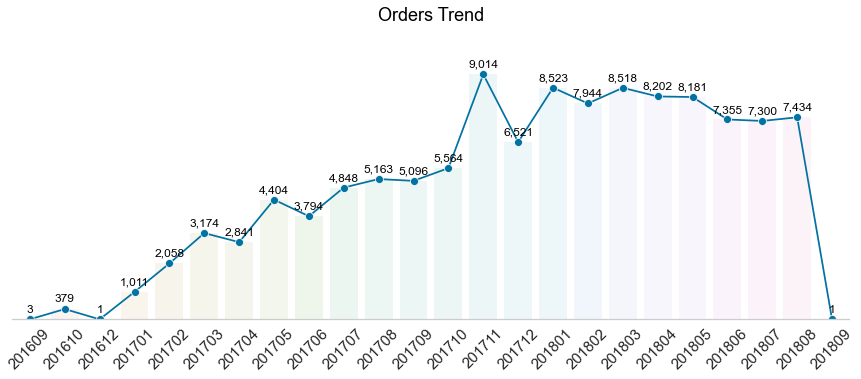

In [96]:
# Finding the trend of orders over a period of time

mergedf['order_year_month'] = mergedf['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
fig = plt.figure(figsize=(15, 5))
ax0 = fig.add_subplot()


# Lineplot - Evolution of e-commerce orders along time 
sns.lineplot(x="order_year_month", y="order_id", data=mergedf.groupby("order_year_month").agg({"order_id" : "count"}).reset_index(), ax=ax0, legend=False,
              marker='o',markersize=8)
sns.barplot(x="order_year_month", y="order_id", data=mergedf.groupby("order_year_month").agg({"order_id" : "count"}).reset_index(), ax=ax0, alpha=0.1)
plt.setp(ax0.get_xticklabels(), rotation=45,fontsize=15)
ax0.set_title("Orders Trend\n", size=18, color='black')
ax0.set_ylabel("")
ax0.set_xlabel("")
ax0.set_ylim(0,10000)
for v in ax0.patches:
        ax0.annotate('{:,.0f}'.format(v.get_height()), (v.get_x()+0.4, v.get_height()),
                    ha='center', va='bottom', xytext=(0, 5), textcoords='offset points',
                    color= 'black', size=12)
ax0.spines["top"].set_visible(False)
ax0.spines["right"].set_visible(False)
ax0.spines["left"].set_visible(False)
ax0.set_yticklabels([])
ax0.set_yticks([])

Insights:

- There is a spike in the number of orders, over 9000 during the month of November 2017
- Black Friday on November 24th, 2017 had the highest number of sales with 1231 orders on that single day itself
- Referring to the month-over-month statistics, Olist has a greatly improved its business over a period of time

# 2) Orders by day of the week and time of the day

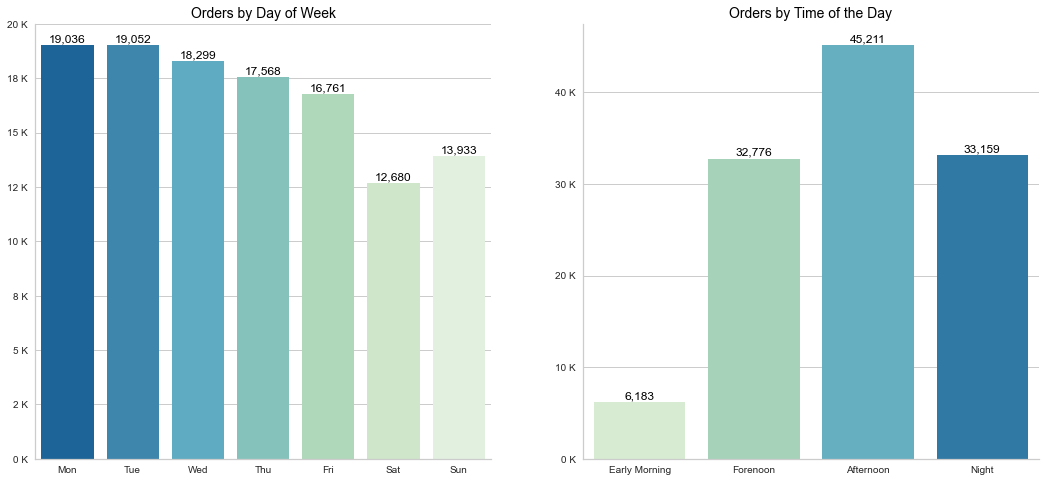

In [97]:
# Finding the trends of the orders by the day of the week

# Defining the plot parameters
fig = plt.figure(figsize=(18, 8))
gs = GridSpec(1, 2, figure=fig)
ax01 = fig.add_subplot(gs[0, 0])
ax02 = fig.add_subplot(gs[0, 1])
mergedf['order_purchase_day_name'] = mergedf['order_purchase_timestamp'].apply(lambda x: x.strftime('%a'))
mergedf['order_purchase_hour'] = mergedf['order_purchase_timestamp'].apply(lambda x: x.hour)

# Defining the hour bins
hr_cntnr = [-0.1, 6, 12, 18, 23]
hr_labs = ['Early Morning', 'Forenoon', 'Afternoon', 'Night']
mergedf['order_purchase_time_day'] = pd.cut(mergedf['order_purchase_hour'], hr_cntnr, labels=hr_labs)

# Setting the order of the days
ordereddays= ["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"]
sns.countplot(x="order_purchase_day_name", data=mergedf, order=ordereddays, ax=ax01, palette="GnBu_r")
ax01.set_title("Orders by Day of Week", size=14, color='black')
ax01.set_xlabel("")
ax01.set_ylabel("")
for p in ax01.patches:
        ax01.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "black")
ax01.spines['top'].set_visible(False)
ax01.spines['right'].set_visible(False)
def thousand_count_y(y, pos):
    return '{:.0f} K'.format(y*1e-3)
formatter_thousand_count_y = FuncFormatter(thousand_count_y)
ax01.yaxis.set_major_formatter(formatter_thousand_count_y)



# Finding trends of orders by time of the day
sns.countplot(x="order_purchase_time_day", data=mergedf,ax=ax02, palette="GnBu")
ax02.set_title("Orders by Time of the Day", size=14, color='black')
ax02.set_xlabel("")
ax02.set_ylabel("")
for p in ax02.patches:
        ax02.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                     ha="center", va="bottom", xytext=(0, 1), textcoords="offset points",
                    color= "black")
ax02.spines['top'].set_visible(False)
ax02.spines['right'].set_visible(False)
ax02.yaxis.set_major_formatter(formatter_thousand_count_y)

Insights:

- From the above bar graph, the number of orders have a downward trend as the days of the week pass, but a slight raise on Sunday
- Both Monday and Tuesday have nearly same number of orders
- Most of the customers placed order during the afternoons
- Fairly similar number of orders are placed during the mornings(Forenoons) and nights

# 3) Trend of sellers joining e-commerce platform

In [98]:
seller_dates = pd.merge(items,orders, on = "order_id")
seller_dates = seller_dates.drop_duplicates(subset=["seller_id"])
seller_dates['order_year_month'] = seller_dates['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
seller_dates.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_year_month
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,3ce436f183e68e07877b285a838db11a,delivered,2017-09-13 08:59:02,2017-09-13 09:45:35,2017-09-19 18:34:16,2017-09-20 23:43:48,2017-09-29,201709
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,f6dd3ec061db4e3987629fe6b26e5cce,delivered,2017-04-26 10:53:06,2017-04-26 11:05:13,2017-05-04 14:35:00,2017-05-12 16:04:24,2017-05-15,201704
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,6489ae5e4333f3693df5ad4372dab6d3,delivered,2018-01-14 14:33:31,2018-01-14 14:48:30,2018-01-16 12:36:48,2018-01-22 13:19:16,2018-02-05,201801
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,d4eb9395c8c0431ee92fce09860c5a06,delivered,2018-08-08 10:00:35,2018-08-08 10:10:18,2018-08-10 13:28:00,2018-08-14 13:32:39,2018-08-20,201808
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,58dbd0b2d70206bf40e62cd34e84d795,delivered,2017-02-04 13:57:51,2017-02-04 14:10:13,2017-02-16 09:46:09,2017-03-01 16:42:31,2017-03-17,201702


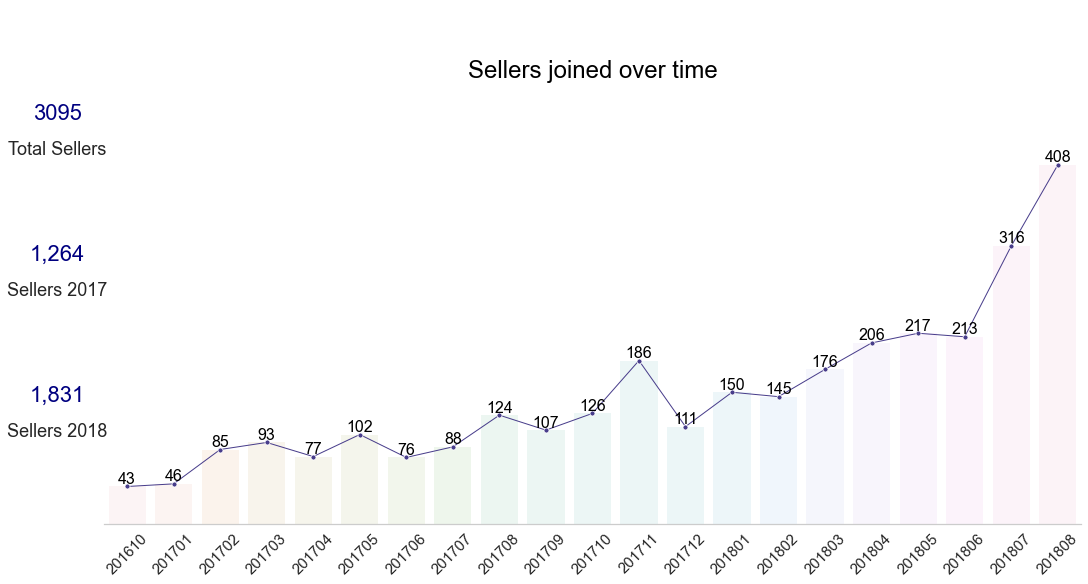

In [99]:
# Defining the plot layout
fig = plt.figure(constrained_layout=True, figsize=(15, 8))

# Giving grid specifications
#from matplotlib.gridspec import GridSpec
ax = fig.add_subplot()

#Sellers per year
sns.lineplot(x="order_year_month", y="order_id", data=seller_dates.groupby("order_year_month").agg({"order_id" : "count"}).reset_index(),ax=ax,
             color='darkslateblue', linewidth=1, marker='o', markersize=5)
sns.barplot(x="order_year_month", y="order_id", data=seller_dates.groupby("order_year_month").agg({"order_id" : "count"}).reset_index(),ax=ax, alpha=0.1)
ax.set_title("\n\nSellers joined over time", size=24, color="black")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_ylim(0, 500)
plt.setp(ax.get_xticklabels(), rotation=45,fontsize=15)
for p in ax.patches:
        ax.annotate('{:,.0f}'.format(p.get_height()), (p.get_x()+0.4, p.get_height()),
                    ha="center", va="top", xytext=(0, 15), textcoords="offset points", 
                    color= "black", size=16)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.set_yticklabels([])
ax.set_yticks([])
        
# Total sellers yearwise
ax.text(-1.5, 460, "3095", fontsize=22, ha='center', color="navy")
ax.text(-1.5, 420, "Total Sellers", fontsize=18, ha='center')
ax.text(-1.5, 300, "1,264", fontsize=22, ha='center', color="navy")
ax.text(-1.5, 260, "Sellers 2017", fontsize=18, ha='center')
ax.text(-1.5, 140, "1,831", fontsize=22, ha='center', color="navy")
ax.text(-1.5, 100, "Sellers 2018", fontsize=18, ha='center')


#plt.suptitle("Customers and Sellers (2017-2018)", size=18)
plt.show()
#plt.tight_layout()

Insight:

- With the rise in popularity of the online shopping, more and more number of retailers moved to online mode of business
- From 2016 to 2018, there is a steady growth in the number of sellers who registered themselves on this online market platform

# 4) Top 20 cities based on customers

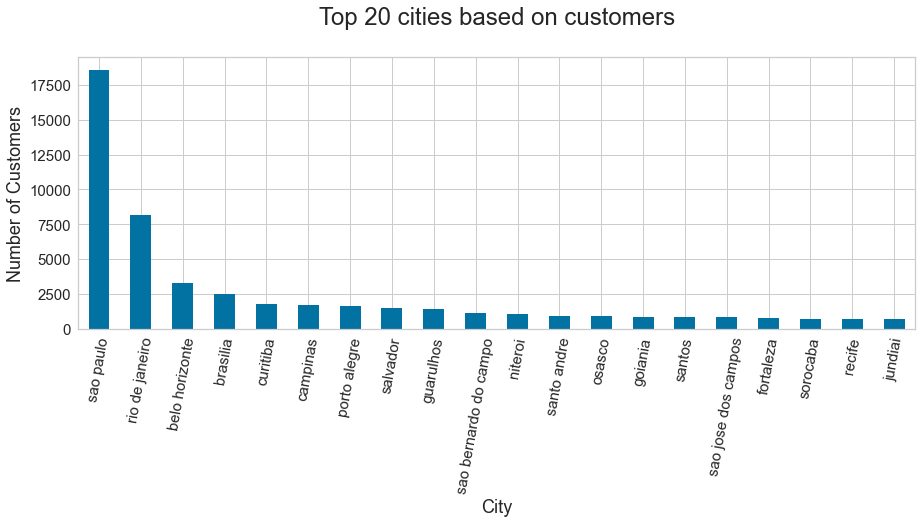

In [100]:
#Top 20 Cities with Highest Customers
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
#print(mergedf.head())


t20 = mergedf['customer_city'].value_counts()[:20]
t20

type(t20)


df1 = pd.DataFrame(t20)
df1
df1 = t20.to_frame().reset_index()
df1.rename(columns = {'index':'city','customer_city':'No. of customers'}, inplace = True)

#plt.figure(figsize=(15,8))
df1.plot.bar(x=0,y=1,figsize=(15,5),legend=False)
plt.title('Top 20 cities based on customers\n',fontsize=24)
plt.xlabel("City", fontsize=18)
plt.ylabel("Number of Customers", fontsize=18)
plt.xticks(fontsize=15, rotation=80)
plt.yticks(fontsize=15)
plt.show()

In [101]:
# Top 20 cities with highest customers(tabulated)
df1

,city,No. of customers
0,sao paulo,18582
1,rio de janeiro,8158
2,belo horizonte,3252
3,brasilia,2466
4,curitiba,1807
5,campinas,1723
6,porto alegre,1658
7,salvador,1507
8,guarulhos,1386
9,sao bernardo do campo,1119


Insight:

- The above table summarizes the top 10 cities in which customers are based

# 5) Top 5 States based on customers

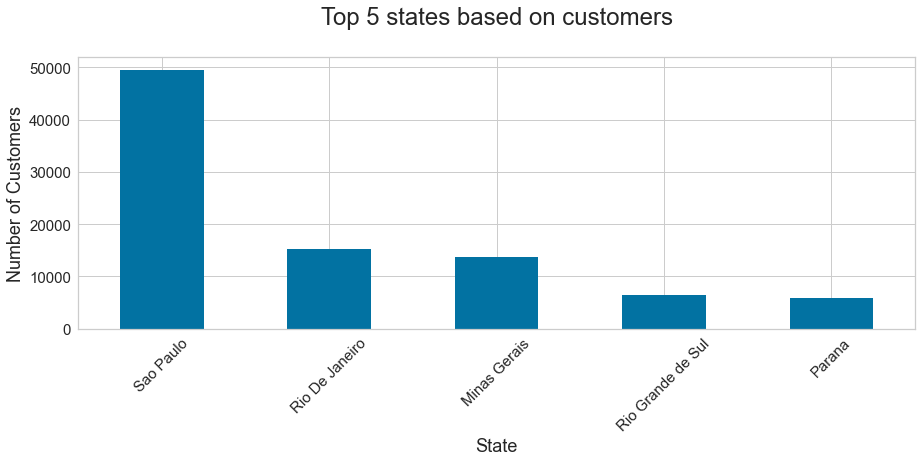

In [102]:


s5 = mergedf['customer_state'].value_counts()[:5]


df2 = pd.DataFrame(s5)
df2 = s5.to_frame().reset_index()
df2.rename(columns = {'index':'state','customer_state':'No. of customers'}, inplace = True)

state_abbs= {'SP': 'Sao Paulo', 
'RJ': 'Rio De Janeiro', 
'MG': 'Minas Gerais', 
'RS': 'Rio Grande de Sul',
'PR': 'Parana'}

# Mapping the full names using lambda function
df2["state"]= df2["state"].apply(lambda m: state_abbs[m])


df2.plot.bar(x=0,y=1,legend=False, figsize=(15,5))
plt.title('Top 5 states based on customers\n',fontsize=24)
plt.xlabel("State", fontsize=18)
plt.ylabel("Number of Customers", fontsize=18)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
plt.show()

In [103]:
# Top 5 states with highest customers(tabulated)
df2

,state,No. of customers
0,Sao Paulo,49527
1,Rio De Janeiro,15220
2,Minas Gerais,13616
3,Rio Grande de Sul,6516
4,Parana,5959


Insight:

- The above table shows the top 5 states from which the orders are received, in other words, highest customer states

# 6) Preferred modes of payment

In [104]:
# Finding no of orders and total purchase value based on payment mode

mergedf["payment_type"] = mergedf["payment_type"].str.capitalize()
pay1 = mergedf.groupby(by=["payment_type"]).agg({"order_id": "count","payment_value": "sum"}).reset_index().sort_values(by="order_id",ascending=False)
pay1.rename(columns={"order_id":"Orders_count"}, inplace=True)
pay1

,payment_type,Orders_count,payment_value
1,Credit_card,86520,15488083.56
0,Boleto,22835,4042302.07
3,Voucher,6282,403611.39
2,Debit_card,1692,253931.68


In [105]:
# Finiding no of orders placed using each payment mode over the years

mergedf['order_purchase_year'] = mergedf['order_purchase_timestamp'].apply(lambda x: x.year)
pay2 = mergedf.groupby(by=["payment_type", "order_purchase_year"]).agg({"order_id": "count"}).reset_index().sort_values(by=["order_purchase_year","order_id"],ascending=False)
pay2.rename(columns={"order_id":"Orders_count"}, inplace=True)
pay2

,payment_type,order_purchase_year,Orders_count
5,Credit_card,2018,47444
2,Boleto,2018,11846
11,Voucher,2018,2946
8,Debit_card,2018,1222
4,Credit_card,2017,38785
1,Boleto,2017,10921
10,Voucher,2017,3314
7,Debit_card,2017,468
3,Credit_card,2016,291
0,Boleto,2016,68


In [106]:
# Finiding no of orders placed using each payment mode by the month of the year

import warnings
warnings.filterwarnings("ignore")
mergedf1 = mergedf.drop_duplicates(subset=["seller_id"])
mergedf1["payment_type"] = mergedf1["payment_type"].str.capitalize()
mergedf1['order_year_month'] = mergedf1['order_purchase_timestamp'].apply(lambda x: x.strftime('%Y%m'))
pay3 = mergedf1.groupby(by=["order_year_month", "payment_type"]).agg({"order_id": "count"}).reset_index().sort_values(by=['order_year_month', 'order_id'], ascending=[True, False])
pay3.rename(columns={"order_id":"Orders_count"}, inplace=True)
pay3

,order_year_month,payment_type,Orders_count
1,201610,Credit_card,32
0,201610,Boleto,7
3,201701,Credit_card,29
2,201701,Boleto,10
4,201701,Debit_card,1
...,...,...,...
68,201807,Voucher,4
70,201808,Credit_card,317
69,201808,Boleto,78
71,201808,Debit_card,16


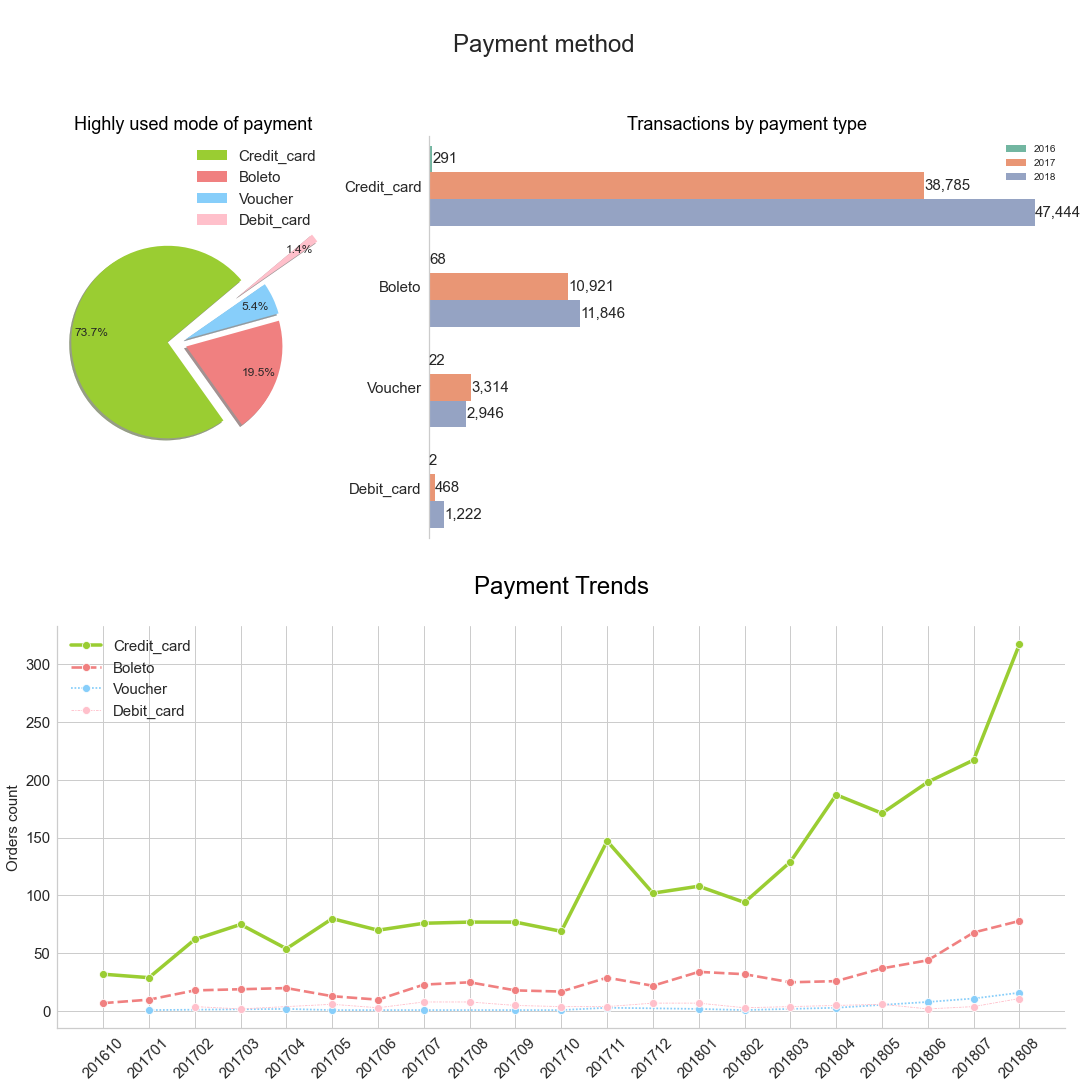

In [107]:
import matplotlib as mp

fig = plt.figure(constrained_layout=True, figsize=(15, 15))

# Axis definition
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1:])
ax3 = fig.add_subplot(gs[1,:])

colors_list = ['yellowgreen', 'lightcoral', 'lightskyblue', 'pink']
explode = (0.1, 0.1, 0.1, 0.8)

ax1.pie(pay1["Orders_count"], explode=explode, autopct='%1.1f%%',shadow=True, startangle=40,pctdistance=0.8, colors=colors_list)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.legend(labels=pay1["payment_type"], loc='best', fontsize=15)
ax1.set_title("Highly used mode of payment", size=18, color='black')

sns.barplot(x="Orders_count", y="payment_type", data=pay2,  ax=ax2, hue="order_purchase_year", palette="Set2")
ax2.legend(loc="best")
ax2.set_xlabel("")
ax2.set_ylabel("")
ax2.set_title("Transactions by payment type", size=18, color="black" )
for rect in ax2.patches:
    ax2.annotate('{:,.0f}'.format(rect.get_width()),(rect.get_width(),rect.get_y() + rect.get_height() / 2),
                xytext=(0, 0),textcoords='offset points', va='center', ha='left', size=15)
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.axes.get_xaxis().set_visible(False) 
plt.setp(ax2.get_yticklabels(),fontsize=15)

sns.lineplot(x='order_year_month', y='Orders_count', data=pay3, ax=ax3, hue='payment_type',legend=False,
             style='payment_type', size='payment_type', palette=colors_list, marker='o',markersize=8)
ax3.legend(labels=pay1["payment_type"], loc='upper left',fontsize=15)
ax3.set_title("\nPayment Trends\n", size=24, color="black")
ax3.set_xlabel("")
ax3.set_ylabel("Orders count", fontsize=15)
plt.setp(ax3.get_xticklabels(), rotation=45,fontsize=15)
plt.setp(ax3.get_yticklabels(),fontsize=15)
ax3.spines['top'].set_visible(False)
ax3.spines['right'].set_visible(False)
ax3.yaxis.set_major_formatter(mp.ticker.StrMethodFormatter('{x:,.0f}'))

plt.suptitle("\nPayment method\n\n", size=24)

plt.show()

Insights:

- From the pie chart, it can be inferred that credit card was the most preferred mode of payment
- From 2016 to 2018, there is hardly any increase in the use of other payment methods like Boleto, Voucher and Debit card
- From 2016 to 2018, credit card usage increase by almost 6 times

# 7) Average delivery times

In [108]:
# convert the dates to datetime format to find the delta between the dates

from datetime import datetime

orders['order_approved_at'] =  pd.to_datetime(orders['order_approved_at'], format='%m/%d/%Y %H:%M')

orders['order_delivered_customer_date'] =  pd.to_datetime(orders['order_delivered_customer_date'], format='%m/%d/%Y %H:%M')

orders['delivery_duration']= orders['order_delivered_customer_date'] - orders['order_approved_at']

print('The average time it takes to deliver the products is ',orders['delivery_duration'].mean())

The average time it takes to deliver the products is  12 days 03:07:42.855694470


Insight:

- Average delivery time for an order is about 12 days which is a bit higher than the other competing businesses like Amazon and Ebay

# 8) Top 10 product categories based on the number of orders

In [109]:
# Grouping the number of orders by product category
tp1=mergedf.groupby(["product_category_name"]).agg({"order_id":"nunique"}).sort_values('order_id',ascending=False)
tp1.rename(columns={"order_id": "No. of Orders"},inplace=True)
tp1.head(10)

,No. of Orders
product_category_name,
bed table bath,9313
HEALTH BEAUTY,8770
sport leisure,7669
computer accessories,6649
Furniture Decoration,6398
domestic profits,5843
Watches present,5576
telephony,4168
automotive,3877


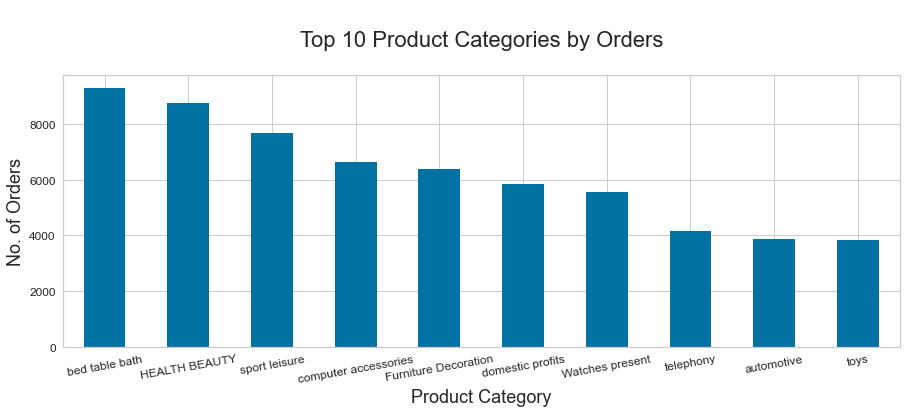

In [110]:
# Plotting the top 10 product categories by number of orders
plot1=tp1.head(10)
plot1.plot.bar(legend=False,figsize=(15,5))
plt.ylabel("No. of Orders", fontdict={'fontname':'Arial','fontsize':18})
plt.xlabel("Product Category",fontdict={'fontname':'Arial','fontsize':18})
plt.xticks(fontsize=12)
plt.xticks(rotation = 10)
plt.yticks(fontsize=12)
plt.title("\nTop 10 Product Categories by Orders\n",fontdict={'fontname':'Arial','fontsize':22})
plt.show()

Insight:

- The above table shows the top 10 product categories based on orders

# 9) Top 10 product categories based on customer ratings

In [111]:
# Grouping the product categories based on customer ratings

tp2 = mergedf.groupby("product_category_name")["review_score"].agg(["mean"]).sort_values(by="mean",ascending=False)
tp2.rename(columns={"mean": "Avg Rating"},inplace=True)
tp2.head(10)

,Avg Rating
product_category_name,
cds dvds musicais,4.642857
Fashion Children's Clothing,4.500000
General Interest Books,4.438503
Imported books,4.419355
flores,4.419355
Construction Tools Tools,4.415842
technical books,4.375465
Drink foods,4.324138
CAFE CAFE HOME BARKETS,4.320513


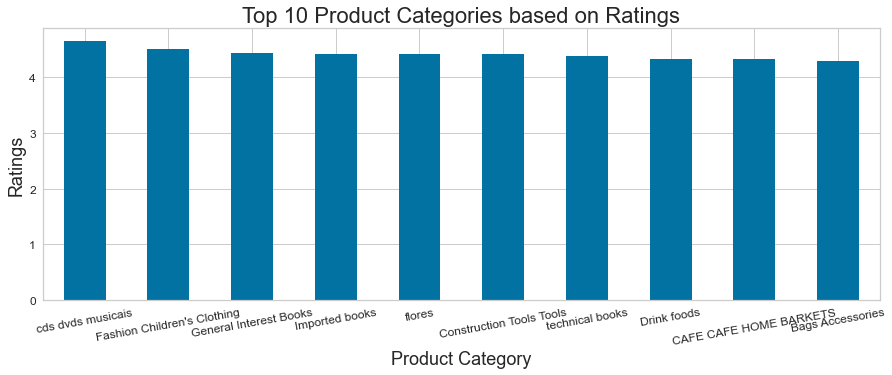

In [112]:
# Plotting the top 10 product categories based on customer ratings

plot2 = tp2.head(10)
plot2.plot.bar(legend=False,figsize=(15,5))
plt.ylabel("Ratings", fontdict={'fontname':'Arial','fontsize':18})
plt.xlabel("Product Category",fontdict={'fontname':'Arial','fontsize':18})
plt.xticks(fontsize=12, rotation = 10)
plt.yticks(fontsize=12)
plt.title("Top 10 Product Categories based on Ratings",fontdict={'fontname':'Arial','fontsize':22})
plt.show()

Insight:


- The above table shows the top 10 product categories based on customer ratings.

# 10) Sentiment Analysis

# Classifying if a user comment is positive or negative

#### Preparing the data

In [113]:
# Preparing the data

a=pd.read_csv("olist_order_reviews_dataset - translated.csv")
comments = a.loc[:,['review_score','review_comment_message_english']]
comments=comments.dropna()
comments.head()

,review_score,review_comment_message_english
3,5,I received well before the deadline.
4,5,Congratulations Lannister Stores I loved buyin...
9,4,Efficient apparatus. On the site the brand of ...
12,4,"But a little, crashing ... for the value is go..."
15,5,"Reliable seller, product OK and delivery befor..."


#### Cleaning data part to convert text to machine language

In [114]:
# adding new column sentimnet based on the review score
sentiment=[]

# Based on the given frequency value, appending corresponding F-score value to the list
for f in comments.review_score:
    if (f<=2):
        sentiment.append("Negative")
    else:
        sentiment.append("Positive")
        
# Adding the F-scores as new column to the RFM dataframe
comments['sentiment']= sentiment

comments

,review_score,review_comment_message_english,sentiment
3,5,I received well before the deadline.,Positive
4,5,Congratulations Lannister Stores I loved buyin...,Positive
9,4,Efficient apparatus. On the site the brand of ...,Positive
12,4,"But a little, crashing ... for the value is go...",Positive
15,5,"Reliable seller, product OK and delivery befor...",Positive
...,...,...,...
99205,4,For this product I received according to the p...,Positive
99208,5,Delivered on time. The product arrived in perf...,Positive
99215,3,"The product was not sent with NF, there is no ...",Positive
99221,5,"Excellent backpack, super fast delivery. Super...",Positive


#### Cleaning data part to convert text to machine language

In [115]:
import re
import string
def text_clean_1(text):
    text = text.lower()
    text = re.sub('\[.*?\]','',text)
    text= re.sub('[%s]'% re.escape(string.punctuation),"",text)
    text = re.sub('\w*\d\w*','',text)
    text=re.sub('[‘’“”,...]','',text)
    text=re.sub('\n','',text)
    return text

cleaned1 = lambda x: text_clean_1(x)

In [116]:
comments['cleaned_description']=pd.DataFrame(comments.review_comment_message_english.apply(cleaned1))
comments.head()

,review_score,review_comment_message_english,sentiment,cleaned_description
3,5,I received well before the deadline.,Positive,i received well before the deadline
4,5,Congratulations Lannister Stores I loved buyin...,Positive,congratulations lannister stores i loved buyin...
9,4,Efficient apparatus. On the site the brand of ...,Positive,efficient apparatus on the site the brand of t...
12,4,"But a little, crashing ... for the value is go...",Positive,but a little crashing for the value is good
15,5,"Reliable seller, product OK and delivery befor...",Positive,reliable seller product ok and delivery before...


#### Splitting Training and Test sets

In [117]:
from sklearn.model_selection import train_test_split


X = comments.cleaned_description
y = comments.sentiment

train_X,test_X,train_y,test_y = train_test_split(X,y, test_size=0.33, random_state=42)
print(len(train_X))
print(len(test_X))
print(len(train_y))
print(len(test_y))

27436
13514
27436
13514


#### Bag of words vectorization

In [118]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

vectorizer = TfidfVectorizer()
clf_log = LogisticRegression(solver='lbfgs')

#### Model Training

In [119]:
from sklearn.pipeline import Pipeline
model = Pipeline([('vectorizer',vectorizer),('classifier',clf_log)])

model.fit(train_X,train_y)

from sklearn.metrics import confusion_matrix

predictions = model.predict(test_X)

conf_matrix= confusion_matrix(predictions,test_y)

#### Plot for Confusion Matrix

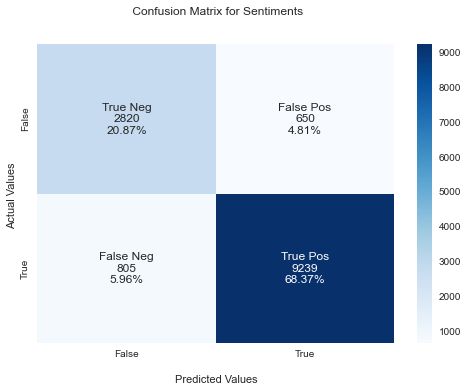

In [120]:
import seaborn as sns

group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                conf_matrix.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     conf_matrix.flatten()/np.sum(conf_matrix)]

labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

ax = sns.heatmap(conf_matrix, annot=labels, fmt='', cmap='Blues')

ax.set_title(' Confusion Matrix for Sentiments\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

#### Evaluation

In [121]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import f1_score

print("Accuracy :",accuracy_score(predictions,test_y))
print("Precision : ",precision_score(predictions, test_y, average='weighted'))
print("Recall : ", recall_score(predictions, test_y, average='weighted'))
print("F1 score : ", f1_score(test_y, predictions, average=None,labels=["Positive","Negative"]))

Accuracy : 0.8923338759804647
Precision :  0.8941270239663222
Recall :  0.8923338759804647
F1 score :  [0.92700547 0.794926  ]


#### Trying on new reviews

In [122]:
example=["worth every dollar"]

result=model.predict(example)

print(result)

['Positive']


In [123]:
example=["this product is terrible"]

result=model.predict(example)

print(result)

['Negative']


In [124]:
example=["Waste of money"]

result=model.predict(example)

print(result)

['Negative']


In [125]:
example=["This is exactly what i was looking for"]

result=model.predict(example)

print(result)

['Positive']


# 11) Recency, Frequency & Monetary Insights

In [126]:
# Recency calculations

# Creating a new dataframe 'rec' for recency calculations
# Finding the most recent order date for every customer
rec = mergedf.groupby(by='customer_unique_id', as_index=False)['order_purchase_timestamp'].max()

# Changing the column name from order_purchase_timestamp to LastOrderDate
rec.rename(columns={"order_purchase_timestamp":"LastOrderDate"}, inplace=True)

# order timestamp contains both date and time. Taking only date from it.
rec["LastOrderDate"] = rec["LastOrderDate"].dt.date

# Taking the most recent order date as the reference date for receny calculation
rec_dt = mergedf['order_purchase_timestamp'].dt.date.max()

# Calculating recency for each customer
rec['Recency'] = rec['LastOrderDate'].apply(lambda x: (rec_dt - x).days)
rec

,customer_unique_id,LastOrderDate,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,116
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,119
2,0000f46a3911fa3c0805444483337064,2017-03-10,542
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,326
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,293
...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,452
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,267
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07,573
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02,124


In [127]:
# Most recent order date out of all orders
rec_dt

datetime.date(2018, 9, 3)

In [128]:
# Monetary calculations

# Calculating total purchase value of each customer
mon = mergedf.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
mon.columns = ['customer_unique_id', 'Monetary']
mon

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19
2,0000f46a3911fa3c0805444483337064,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,43.62
4,0004aac84e0df4da2b147fca70cf8255,196.89
...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,4134.84
94716,fffea47cd6d3cc0a88bd621562a9d061,84.58
94717,ffff371b4d645b6ecea244b27531430a,112.46
94718,ffff5962728ec6157033ef9805bacc48,133.69


In [129]:
# Frequency calculations

# Finding number of orders placed by each customer
freq = mergedf.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
freq.rename(columns={"order_id":"Frequency"}, inplace=True)
freq

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1
94716,fffea47cd6d3cc0a88bd621562a9d061,1
94717,ffff371b4d645b6ecea244b27531430a,1
94718,ffff5962728ec6157033ef9805bacc48,1


In [130]:
# List of customers in descending order of the number of orders placed by them
mergedf.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).sort_values('order_id',ascending=False)

,order_id
customer_unique_id,
8d50f5eadf50201ccdcedfb9e2ac8455,16
3e43e6105506432c953e165fb2acf44c,9
6469f99c1f9dfae7733b25662e7f1782,7
ca77025e7201e3b30c44b472ff346268,7
1b6c7548a2a1f9037c1fd3ddfed95f33,7
...,...
565427a96f0865bacef2a6b400197b46,1
565283fe12fa1a894ef451c4bfb391ed,1
5650e95cbd234d30d80befa7c4ab1618,1


In [131]:
# Merging all the RFM dataframes into one

rfm=rec.merge(freq, on="customer_unique_id").merge(mon,on="customer_unique_id")
rfm

,customer_unique_id,LastOrderDate,Recency,Frequency,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10,116,1,141.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07,119,1,27.19
2,0000f46a3911fa3c0805444483337064,2017-03-10,542,1,86.22
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12,326,1,43.62
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14,293,1,196.89
...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08,452,1,4134.84
94716,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10,267,1,84.58
94717,ffff371b4d645b6ecea244b27531430a,2017-02-07,573,1,112.46
94718,ffff5962728ec6157033ef9805bacc48,2018-05-02,124,1,133.69


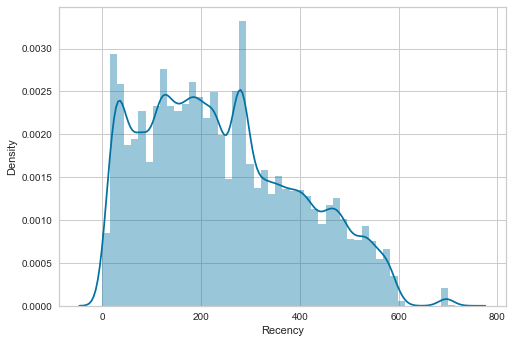

In [132]:
sns.distplot(rfm['Recency'])
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

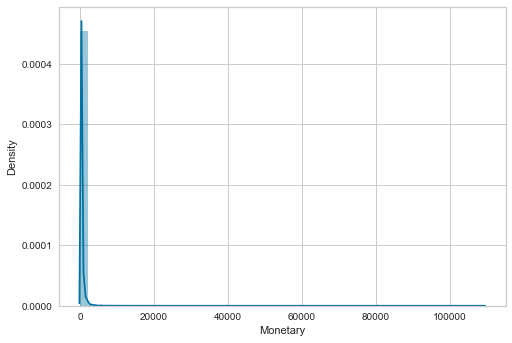

In [133]:
sns.distplot(rfm['Monetary'])
plt.show

# RFM Inferences

In [134]:
# Finding mean and modes of Recency and Monetary values

# Defining a function to find mode of the data
def my_mode(sample):
    c = Counter(sample)
    return [k for k, v in c.items() if v == c.most_common(1)[0][1]]

print("Inferences:\n")
print("- On an average, the customers placed orders",int(np.mean(rfm['Recency'])), "days ago")
print("- A customer's average order value was",int(np.mean(rfm['Monetary'])), "dollars")
print("- But most of the customers placed orders",my_mode(rfm['Recency']), "days ago")

Inferences:

- On an average, the customers placed orders 243 days ago
- A customer's average order value was 213 dollars
- But most of the customers placed orders [283] days ago


# RFM Scoring

In [135]:
# Based on the Recency, Frequency and Monetary values, RFM scores are assigned to each customer
# This RFM scoring also serves as data scaling

# Starting with Recency scores
# Finding the quantiles(Q1, Q2, Q3) of recency values
np.quantile(rfm.Recency,[0.25,.5,.75])

array([119., 224., 353.])

In [136]:
# If Recency <= Q1 , then R-score is 4
# If Q1 < Recency <= Q2 , then R-score is 3
# If Q2 < Recency <= Q3 , then R-score is 2
# If Recency > Q3, then R-score is 1

# Initializing an empty rscore list
rscore=[]

# Based on the given recency value, appending corresponding R score value to the list
for r in rfm.Recency:
    if (r<=119):
        rscore.append(4)
    elif (119<r<=224):
        rscore.append(3)
    elif (224<r<=353):
        rscore.append(2)
    else:
        rscore.append(1)
        
# Adding the R-scores as new column to the RFM dataframe
rfm['R_score']=rscore

In [137]:
# Calculating F-scores
# If Frequency <= 2, then F-score is 1
# If 2 < Frequency <= 4, then F-score is 2
# If 4 < Frequency <= 7, then F-score is 3
# If Frequency > 7, then F-score is 4

# Initializing an empty fscore list
fscore=[]

# Based on the given frequency value, appending corresponding F-score value to the list
for f in rfm.Frequency:
    if (f<=2):
        fscore.append(1)
    elif (2<f<=4):
        fscore.append(2)
    elif (4<f<=7):
        fscore.append(3)
    else:
        fscore.append(4)
        
# Adding the F-scores as new column to the RFM dataframe
rfm['F_score']=fscore

In [138]:
# Calculating M-scores
# Finiding out the quantiles(Q1, Q2, Q3) of monetary values
np.quantile(rfm.Monetary,[0.25,.5,.75,1])

array([6.3900000e+01, 1.1315000e+02, 2.0296500e+02, 1.0931264e+05])

In [139]:
# If Monetary <= Q1, then M-score is 1
# If Q1 < Monetary <= Q2, then M-score is 2
# If Q2 < Monetary <= Q3, then M-score is 3
# If Monetary > Q3, then M-score is 4

# Initializing an empty mscore list
mscore=[]

# Based on the given monetary value, appending corresponding M-score value to the list
for m in rfm.Monetary:
    if (m<=64):
        mscore.append(1)
    elif (64<m<=132):
        mscore.append(2)
    elif (132<m<=203):
        mscore.append(3)
    else:
        mscore.append(4)
        
# Adding the M-scores as new column to the RFM dataframe
rfm['M_score']=mscore

In [140]:
# Creating a new dataframe with only customer IDs and RFM scores
rfmdf=rfm.drop(["LastOrderDate","Recency","Frequency","Monetary"],axis=1)
rfmdf

,customer_unique_id,R_score,F_score,M_score
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1
2,0000f46a3911fa3c0805444483337064,1,1,2
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1
4,0004aac84e0df4da2b147fca70cf8255,2,1,3
...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1,1,4
94716,fffea47cd6d3cc0a88bd621562a9d061,2,1,2
94717,ffff371b4d645b6ecea244b27531430a,1,1,2
94718,ffff5962728ec6157033ef9805bacc48,3,1,3


# 12) K-Means Clustering

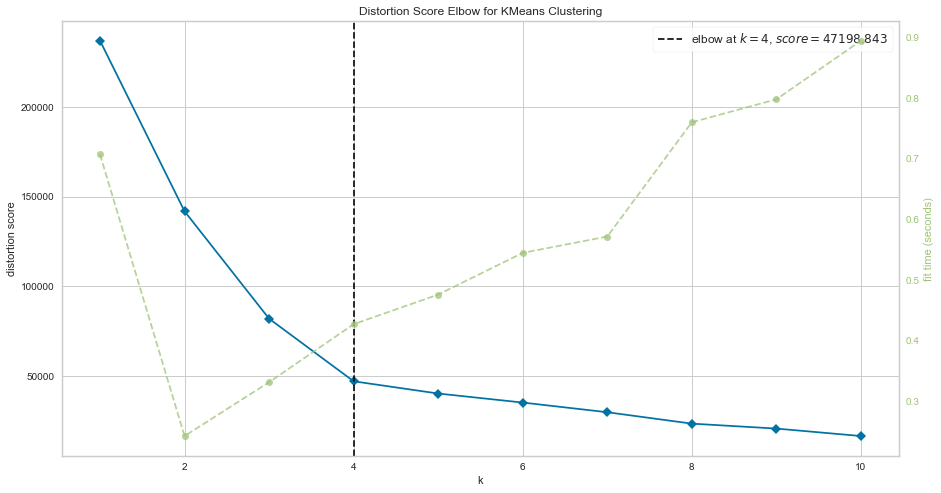

In [141]:
# Using KElbowVisualizer in yellowbrick library to find optimal number of clusters

#!pip install yellowbrick
import yellowbrick
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

clustdata=rfmdf.drop("customer_unique_id",axis=1)
model = KMeans()
plt.figure(figsize=(15,8))
visualizer = KElbowVisualizer(model, k=(1,11)).fit(clustdata)

for label in visualizer.ax.texts:
    label.set_size(18)
visualizer.show()
plt.show()

In [142]:
# Another way to get optimal number of clusters

# Importing Kmeans from sklearn
from sklearn.cluster import KMeans

# Defining the model
km_model= KMeans()

# To find the best K-value
k_value=[1,2,3,4,5,6,7,8,9,10]
wcss=[] # Within Cluster Sum-of-Squares

for i in k_value:
    km_model= KMeans(n_clusters=i)
    km_model.fit(clustdata)
    wcss.append(km_model.inertia_)

Optimum number of clusters can be obtained by using either elbow plot or silhoutte scores.
Compared to elbow plot method, silhoutte scoring method is computationally intesive and time demanding.
Hence, we are going to use Elbow plot method

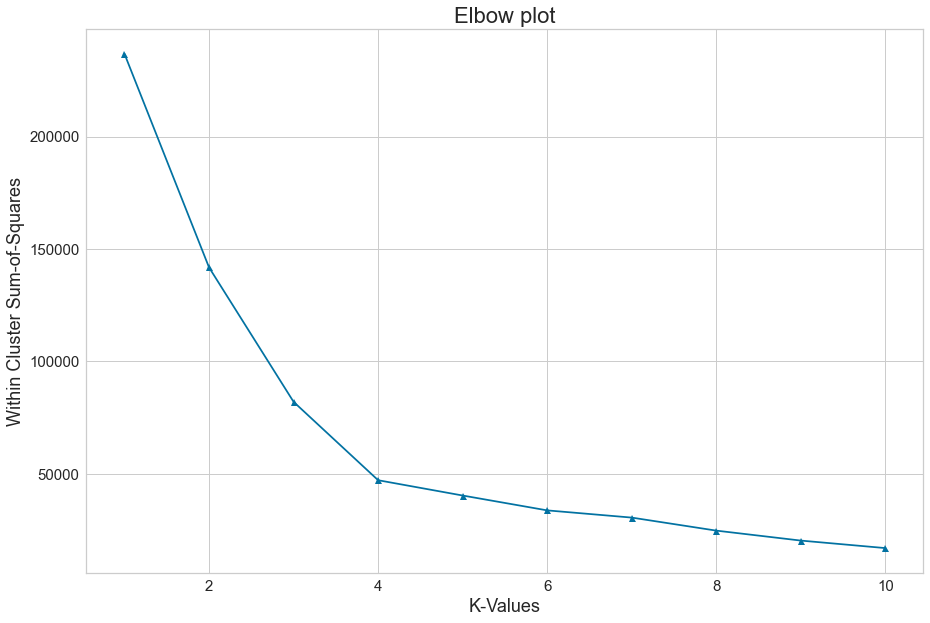

In [143]:
# Elbow plot of k-values and WCSS
plt.figure(figsize=(15,10))
plt.plot(k_value,wcss,'^b-')
plt.title("Elbow plot", fontdict={'fontname':'Arial','fontsize':22})
plt.xlabel("K-Values",fontdict={'fontname':'Arial','fontsize':18})
plt.ylabel("Within Cluster Sum-of-Squares",fontdict={'fontname':'Arial','fontsize':18})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

From the above elbow plot, we can see that the elbow is at K=4.
Hence, performing K-Means clustering with 4 number of clusters.

In [144]:
# Implementing K-Means Clustering

km_model=KMeans(n_clusters=4, random_state=123)
pred=km_model.fit_predict(clustdata)

# Attaching cluster label to each customer id
rfmdf['cluster']=km_model.labels_
clustdata['cluster']=km_model.labels_

In [145]:
rfmdf

,customer_unique_id,R_score,F_score,M_score,cluster
0,0000366f3b9a7992bf8c76cfdf3221e2,4,1,3,3
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4,1,1,0
2,0000f46a3911fa3c0805444483337064,1,1,2,2
3,0000f6ccb0745a6a4b88665a16c9f078,2,1,1,2
4,0004aac84e0df4da2b147fca70cf8255,2,1,3,1
...,...,...,...,...,...
94715,fffcf5a5ff07b0908bd4e2dbc735a684,1,1,4,1
94716,fffea47cd6d3cc0a88bd621562a9d061,2,1,2,2
94717,ffff371b4d645b6ecea244b27531430a,1,1,2,2
94718,ffff5962728ec6157033ef9805bacc48,3,1,3,3


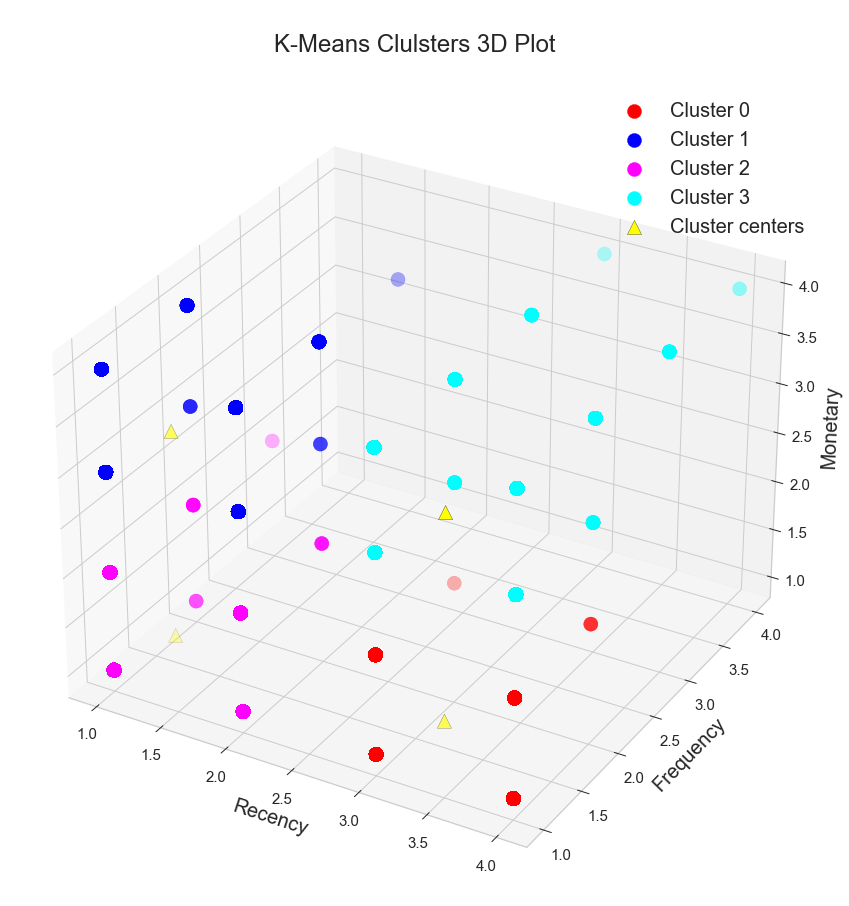

In [146]:
# Plotting the clusters with centroids

# Getting centroids
ctrd=km_model.cluster_centers_
# Finiing unique labels
clust0=clustdata[clustdata.cluster==0]
clust1=clustdata[clustdata.cluster==1]
clust2=clustdata[clustdata.cluster==2]
clust3=clustdata[clustdata.cluster==3]
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(clust0.R_score, clust0.F_score, clust0.M_score,s=200, color='red', label='Cluster 0')
ax.scatter(clust1.R_score, clust1.F_score, clust1.M_score,s=200, color='blue', label='Cluster 1')
ax.scatter(clust2.R_score, clust2.F_score, clust2.M_score,s=200, color='magenta', label='Cluster 2')
ax.scatter(clust3.R_score, clust3.F_score, clust3.M_score,s=200, color='cyan', label='Cluster 3')
ax.scatter(ctrd[:,0],ctrd[:,1],ctrd[:,2],s=200, color= 'yellow',marker='^',edgecolors='black',label="Cluster centers")
ax.set_xlabel('Recency', fontsize=20, labelpad=12)
ax.set_ylabel('Frequency', fontsize=20, labelpad=12)
ax.set_zlabel('Monetary', fontsize=20, labelpad=12)
ax.xaxis.set_tick_params(labelsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.zaxis.set_tick_params(labelsize=15)
plt.title("\nK-Means Clulsters 3D Plot\n", fontsize=24)
plt.legend(fontsize=20)
plt.show()

In [147]:
# Grouping the customers based on the clusters

clustviz=clustdata.groupby(["cluster"]).agg({'R_score':'mean','F_score':'mean','M_score':'mean'}).reset_index()
clustviz

,cluster,R_score,F_score,M_score
0,0,3.500206,1.000112,1.554737
1,1,1.509243,1.003858,3.587946
2,2,1.495170,1.000367,1.563485
3,3,3.500264,1.007935,3.574032


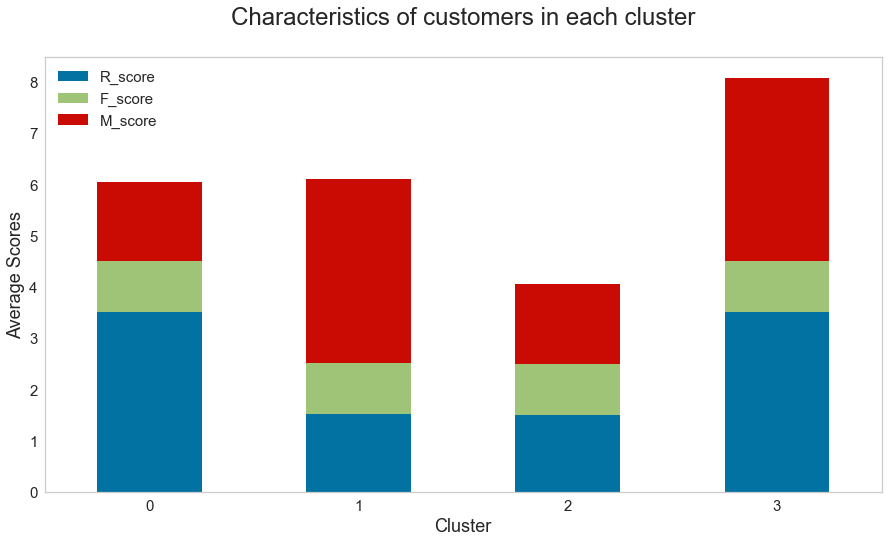

In [148]:
# Checking the distribution of customers in each cluster

clustviz.plot(x='cluster', kind='bar', stacked=True, figsize=(15,8), grid=False)
plt.title('Characteristics of customers in each cluster\n',fontsize=24)
plt.xlabel("Cluster", fontsize=18)
plt.ylabel("Average Scores", fontsize=18)
plt.xticks(fontsize=15, rotation=0)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
plt.show()

# Clustering conclusions and recommended strategies:

From the above bar graph, F_scores of the customers in each cluster is fairly similar. Hence F_score would be less important
when deciding the clusters.

Cluster descriptions:

- Cluster 0(New customers) on an average has a higher recency score than the others and less monetary score which implies that these are the new customers with less spending

- Cluster 1(High spenders) has the customers whose spending is higher, but their receny score is a bit low which makes this a group of big spenders

- Cluster 2(Low spenders) has the customers who score the least of all which means they are low spenders and have not placed any orders in the recent times

- Cluster 3(Loyal customers) has the customers who have higher recency scores and monetary scores as well which make them the most loyal customers to the business

Recommended strategies:

- Cluster 0: Giving them great offers and discounts so that they will gain confidence on Olist
- Cluster 1: Offering them priority access to promotional offers and discount sale days
- Cluster 2: Offering them quality products that are value for their money, so that they will want to buy more from Olist
- Cluster 3: Give them both priority access and additional loyalty reward programs as a token of appreciation for their continued trust in the business